## Linear Regression Analysis between the Atlantic Multidecadal Oscillation and ERA5 monthly averaged precip anomalies over Africa

### import linregress package

In [3]:
from scipy.stats import linregress


### First, do regression analysis between ERA5 data variables for continental, weighted  African region

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE

In [5]:
f= '/scratch/areed29/ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
data_lat= DS1.latitude #latitudes
data_lon= DS1.longitude #longitudes
nlats = len(data_lat[:])
nlons = len(data_lon[:])
time = DS1.time
#Extracts variables
total_cloud_cover = DS1.tcc
total_precip = DS1.tp
column_cloud_lw= DS1.tclw
total_column_wv = DS1.tcwv
ds_mean_1 = DS1.mean(dim=('time','expver')) #this removes the expver variable in the dataset by averaging over that dimension
total_cloud_cover_1 = ds_mean_1.tcc.values #total cloud cover
total_precip_1= ds_mean_1.tp.values #total precipitation
column_cloud_lw_1 = ds_mean_1.tclw.values #total column cloud liquid water
total_column_watervapor = ds_mean_1.tcwv.values #total column cloud water vapor

In [6]:
# First, calculate climatology; without any weighting or masking
ds_mean = DS1.mean(dim=('expver'))
ds_climo = ds_mean.groupby('time.month').mean()
#ANOMALIES
#Next, calculate the anomalies
ds_anoms = ds_mean.groupby('time.month')-ds_climo
print(ds_anoms)

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 tim

<xarray.Dataset>
Dimensions:    (latitude: 401, longitude: 241, time: 513)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8 9
Data variables: (12/34)
    cbh        (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    cp         (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    crr        (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    hcc        (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    ilspf      (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    lsm        (time, latitude, longitude) float32 das

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 tim

### Next, Normalization of anomalies

In [7]:
#Calculating sigma (standard deviation) for each variable 
clouds_std = ds_anoms['tcc'].std()
precip_std = ds_anoms['tp'].std()
tcwv_std_0 = ds_anoms['tcwv'].std()
tcc_norm= ds_anoms['tcc']/clouds_std
tp_norm=ds_anoms['tp']/precip_std
tcwv_norm=ds_anoms['tcwv']/tcwv_std_0

### Apply masking

In [8]:
# Apply masking
mask = ds_mean.lsm #loads in land-sea mask
tcc_masked = tcc_norm.where(mask>0.5)
tp_masked = tp_norm.where(mask>0.5)
tcwv_masked = tcwv_norm.where(mask>0.5)
print(tp_masked)

<xarray.DataArray 'tp' (time: 513, latitude: 401, longitude: 241)>
dask.array<where, shape=(513, 401, 241), dtype=float32, chunksize=(1, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8 9


### Apply weighting

In [9]:
# Apply cosine weighting
rad = 4.*np.arctan(1.)/180.
clat = np.cos(data_lat*rad)
tcc_weighted = tcc_masked.weighted(clat).mean(dim=('latitude','longitude'))
tp_weighted = tp_masked.weighted(clat).mean(dim=('latitude','longitude'))
tcwv_weighted = tcwv_masked.weighted(clat).mean(dim=('latitude','longitude'))

Text(0.7, 1, 'Continental Africa Weighted Normalized Anomalies')

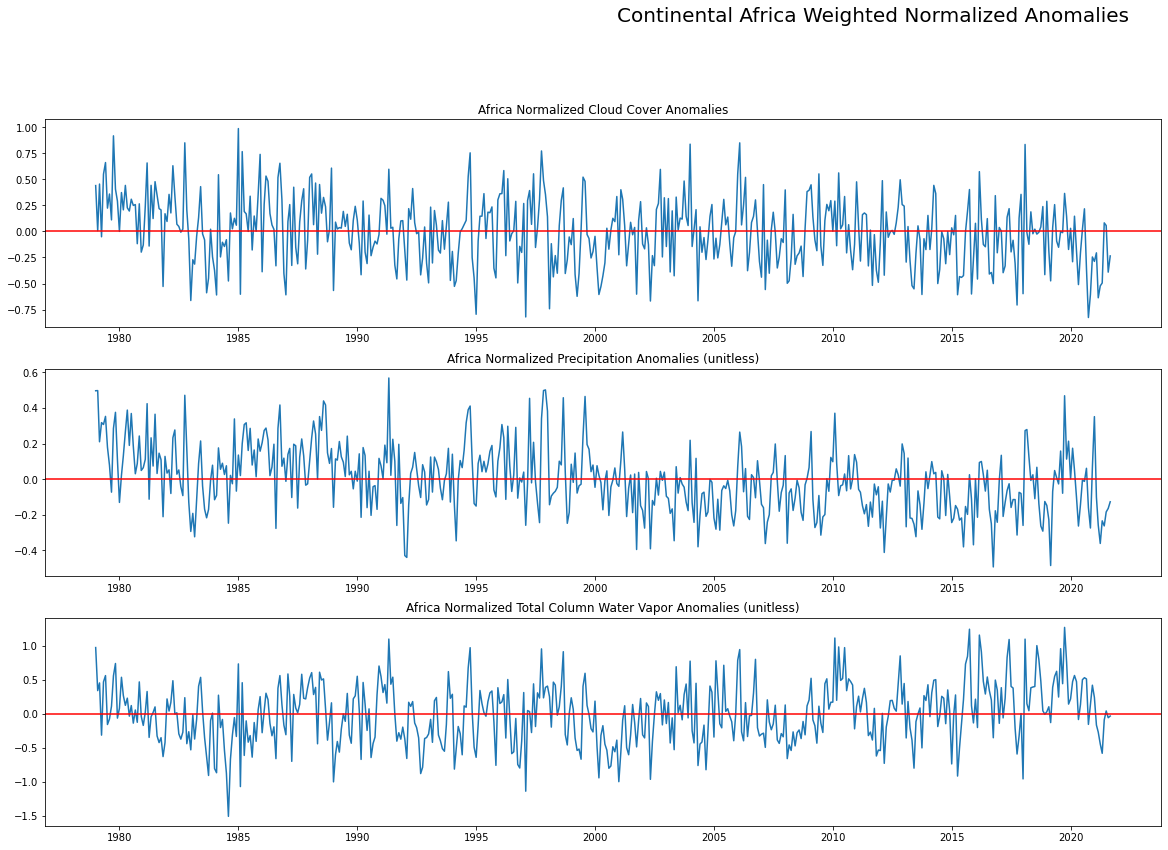

In [8]:
fig = plt.figure(figsize=(20,13))
# Set height padding for plots
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
#First plot: Total Cloud Cover
ax_cloudcover = fig.add_subplot(3,1,1)
ax_cloudcover.plot(tcc_weighted['time'],tcc_weighted)
ax_cloudcover.axhline(y=0.0, color='r', linestyle='-')
ax_cloudcover.set_title('Africa Normalized Cloud Cover Anomalies') 
#Second plot: Total Precip
ax_precip = fig.add_subplot(3,1,2)
ax_precip.plot(tp_weighted['time'], tp_weighted)
ax_precip.axhline(y=0.0, color='r', linestyle='-')
ax_precip.set_title('Africa Normalized Precipitation Anomalies (unitless)') 
#Third plot: Total Column Cloud Water Vapor
ax_wv = fig.add_subplot(3,1,3)
ax_wv.plot(tcwv_weighted['time'],tcwv_weighted)
ax_wv.axhline(y=0.0, color='r', linestyle='-')
ax_wv.set_title('Africa Normalized Total Column Water Vapor Anomalies (unitless)') 
plt.suptitle('Continental Africa Weighted Normalized Anomalies',x=0.7,y=1,fontsize = 20)

### Linear regression between Cloud cover anomalies and precipitation anomalies

In [10]:
slope, intercept, r_value, p_value, std_err = linregress(tcc_weighted, tp_weighted)
slope,intercept,r_value,p_value,std_err

(0.36079674723656946,
 4.695084126554275e-09,
 0.6304776382483317,
 3.351368630840136e-58,
 0.019649896252633987)

In [11]:
r_sq=r_value**2
r_sq


0.39750205233119423

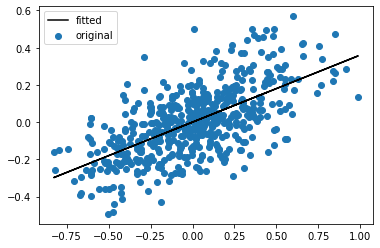

In [11]:
plt.scatter(tcc_weighted, tp_weighted)
plt.plot(tcc_weighted, intercept + slope*tcc_weighted, 'k')
plt.legend(['fitted','original'])

### Linear Regression between precipitation anomalies and precipitable water anomalies

In [12]:
slope, intercept, r_value, p_value, std_err = linregress(tp_weighted, tcwv_weighted)
slope,intercept,r_value,p_value,std_err

(1.0394482398112623,
 9.295071379256115e-09,
 0.44012186004779313,
 1.0218507204995066e-25,
 0.09381361153572129)

In [13]:
r_sq=r_value**2
r_sq


0.1937072516919292

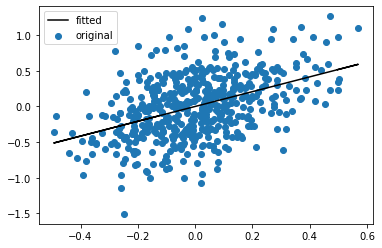

In [14]:
plt.scatter(tp_weighted, tcwv_weighted)
plt.plot(tp_weighted, intercept + slope*tp_weighted, 'k')
plt.legend(['fitted','original'])

### Linear Regression between cloud cover anomalies and precipitable water anomalies

In [15]:
slope, intercept, r_value, p_value, std_err = linregress(tcc_weighted, tcwv_weighted)
slope,intercept,r_value,p_value,std_err

(0.815223659364925,
 1.9903658324653605e-08,
 0.6031897055350943,
 3.777287198087327e-52,
 0.0476865965314713)

In [16]:
r_sq=r_value**2
r_sq


0.3638378208635138

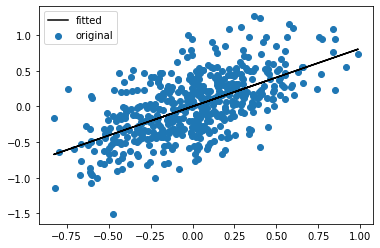

In [17]:
plt.scatter(tcc_weighted, tcwv_weighted)
plt.plot(tcc_weighted, intercept + slope*tcc_weighted, 'k')
plt.legend(['fitted','original'])

### Regression with AMO

In [12]:
#Climate index of choice: Atlantic Multidecadal Oscillation (AMO)
path='/shared/ccsm4/kpegion/obs2/CLIM_INDICES/'
file='amon.us.data'
index_name='amo'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,na_values=['-99.99','-99.990'])
df.drop(df.tail(4).index,inplace=True)


In [13]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1948-1-01


In [14]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq='MS')

In [15]:
clim_index=df.T.unstack().values
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='amo')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    amo      (time) object '-0.017' '-0.029' '0.026' '-0.072' ... nan nan nan

Text(0.5, 0.98, 'Atlantic Multidecadal Oscillation')

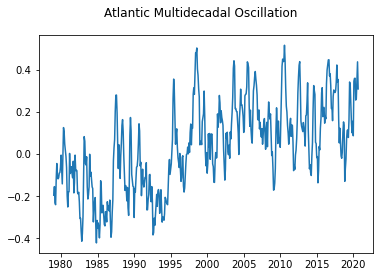

In [16]:
#Slice array to be consistent with precip data
sliced_amo=ds_index.sel(time=slice(ds_index['time'][372],ds_index['time'][-4]))
#print(sliced_amo)
#Warm AMO- above 0
#Cold AMO-below 0
amo_values = sliced_amo.amo
#print(nao_values)
amo_float = amo_values.astype(float)
#print(amo_float)
warm_amo=amo_float.where(amo_float>0.0)
cold_amo = amo_float.where(amo_float<0.0)
plt.plot(amo_float['time'],amo_float)
plt.suptitle('Atlantic Multidecadal Oscillation')
#plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/AMO_defined')

In [17]:
### Slice ERA5 data to match with AMO index dates
precip_anoms=tp_weighted.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))
clouds_anoms=tcc_weighted.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))
prec_water_anoms=tcwv_weighted.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))

In [21]:
### Slicing with masked array for maps
precip_anoms_full=tp_masked.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))
precip_anoms_full_1=tp_norm.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))
clouds_anoms_full=tcc_masked.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))
prec_water_anoms_full=tcwv_masked.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))

### Linear Regression between AMO index and cloud cover anomalies

In [24]:
slope, intercept, r_value, p_value, std_err = linregress(clouds_anoms, amo_float)
slope,intercept,r_value,p_value,std_err

(-0.05632188389593935,
 0.033820149711389295,
 -0.08783692328390215,
 0.04942063833746247,
 0.028593540062634024)

In [25]:
r_sq=r_value**2
r_sq

0.0077153250919821115

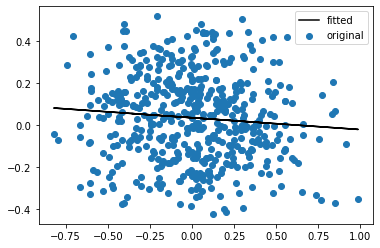

In [26]:
plt.scatter(clouds_anoms, amo_float)
plt.plot(clouds_anoms, intercept + slope*clouds_anoms, 'k')
plt.legend(['fitted','original'])

### Linear Regression between AMO index and precipitation anomalies

In [27]:
slope, intercept, r_value, p_value, std_err = linregress(precip_anoms, amo_float)
slope,intercept,r_value,p_value,std_err

(-0.2700310862949025,
 0.03425732390137223,
 -0.2420267934600965,
 4.1224726403510137e-08,
 0.048461009092940474)

In [28]:
r_sq=r_value**2
r_sq

0.05857696875257621

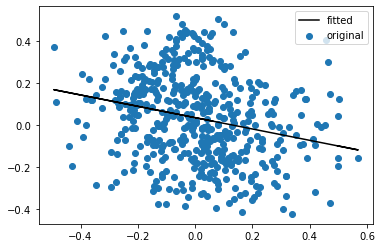

In [29]:
plt.scatter(precip_anoms, amo_float)
plt.plot(precip_anoms, intercept + slope*precip_anoms, 'k')
plt.legend(['fitted','original'])

### Linear Regression between AMO index and precipitable water anomalies

In [30]:
slope, intercept, r_value, p_value, std_err = linregress(prec_water_anoms, amo_float)
slope,intercept,r_value,p_value,std_err

(0.12637817688623865,
 0.03308907696980231,
 0.2711677284593644,
 6.812740775729454e-10,
 0.02008163349506254)

In [31]:
r_sq=r_value**2
r_sq

0.07353193695781157

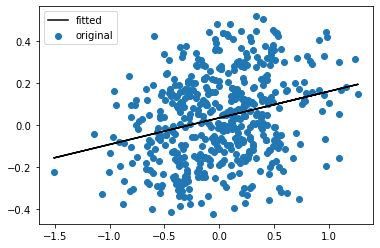

In [32]:
plt.scatter(prec_water_anoms, amo_float)
plt.plot(prec_water_anoms, intercept + slope*prec_water_anoms, 'k')
plt.legend(['fitted','original'])

### Plotting Regression Maps

In [ ]:
# Create a for loop through lon and then lat and perfrom linregress
nx=len(precip_anoms_full['longitude'])
ny=len(precip_anoms_full['latitude'])
print(nx)
print(ny)
slope_0 = np.zeros((ny,nx))
intercept_0 = np.zeros((ny,nx))
r_value_0 = np.zeros((ny,nx))
p_value_0 = np.zeros((ny,nx))
std_err_0= np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        slope, intercept, r_value, p_value, std_err = linregress(amo_float, precip_anoms_full[:,j,i])
        slope_0[j,i]=slope
        intercept_0[j,i]=intercept
        r_value_0[j,i]=r_value
        p_value_0[j,i] = p_value
        std_err_0[j,i]=std_err
#print(r_value_0)
print(slope_0.shape)

241
401
